In [1]:

import ffmpeg
import cv2
import numpy as np
import os
from numpy.linalg import svd, inv
from matplotlib import pyplot as plt
from ArucoDetector import *
from pprint import pprint

In [2]:
# random calibration data
imsize = (1280, 720)
K = cv.getDefaultNewCameraMatrix(
    np.diag([1280, 1280, 1]), imsize, True)
arDetector = ArUcoDetector(imsize, K)

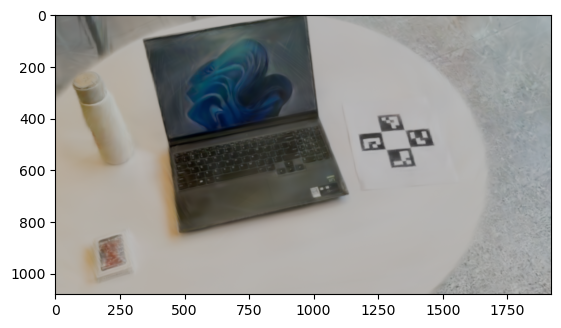

In [3]:
frame = cv2.imread("images/detected_marker_2.png")
# frame = cv2.imread("images/DICT_4X4_250_id_0123.png")
fig = plt.figure()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [4]:
# detect the marker
corners, ids, rejected = arDetector.detector.detectMarkers(frame)
print(ids.ravel())
pprint(corners)

[3 1]
(array([[[1357.,  452.],
        [1443.,  442.],
        [1466.,  506.],
        [1378.,  512.]]], dtype=float32),
 array([[[1177.,  465.],
        [1261.,  458.],
        [1279.,  521.],
        [1189.,  528.]]], dtype=float32))


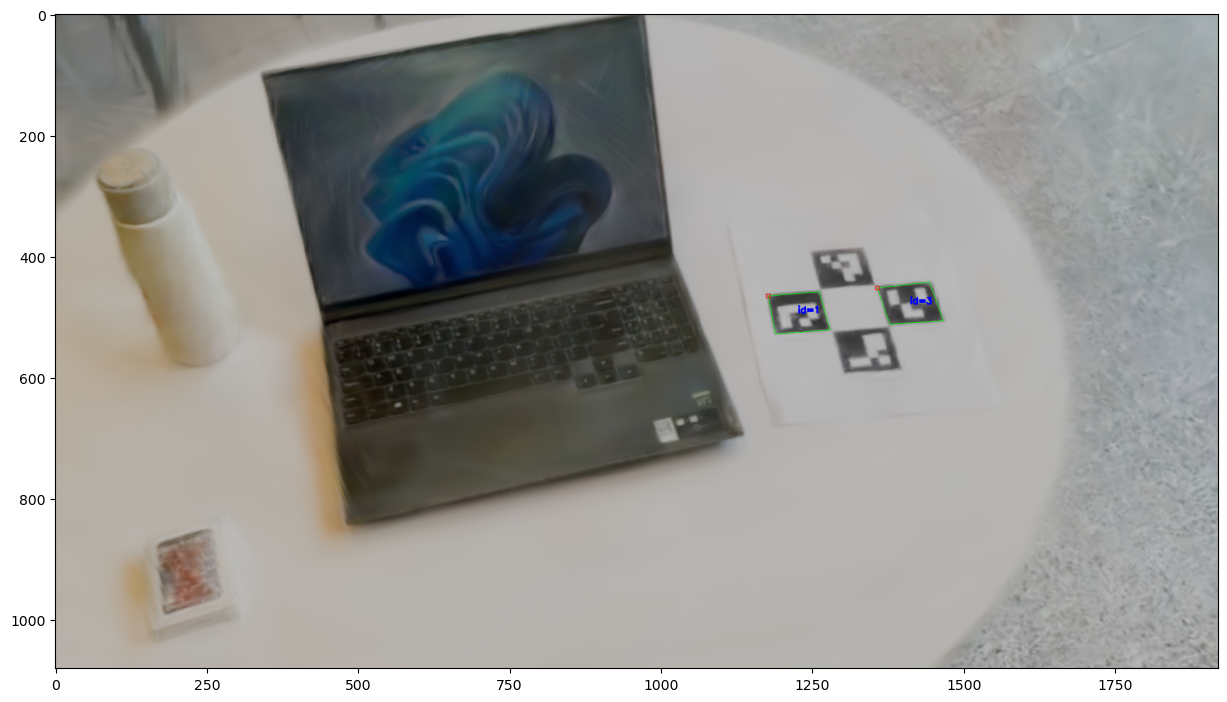

In [5]:
plt.figure(figsize=(15,15))
cv.aruco.drawDetectedMarkers(frame, corners, ids)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
# sort the corners by id
id_argsort = np.argsort(ids.ravel())
id_sorted = ids.ravel()[id_argsort]
corners_sorted = [corners[i] for i in id_argsort]

print(id_sorted)
pprint(corners_sorted)

[1 3]
[array([[[1177.,  465.],
        [1261.,  458.],
        [1279.,  521.],
        [1189.,  528.]]], dtype=float32),
 array([[[1357.,  452.],
        [1443.,  442.],
        [1466.,  506.],
        [1378.,  512.]]], dtype=float32)]


In [7]:
rvecs, tvecs = cv.aruco.estimatePoseSingleMarkers(
    corners_sorted, 6, K, None)[:2]

print("tvecs:")
pprint(tvecs.reshape(-1, 3))

print("rvecs:")
pprint(rvecs.reshape(-1, 3))

tvecs:
array([[43.8345071 ,  9.93050385, 95.67792318],
       [59.98082317,  9.25016087, 99.61479707]])
rvecs:
array([[ 2.32648447,  0.0074749 , -0.41760055],
       [-2.47459843,  0.48317592,  0.9003637 ]])
